<a href="https://colab.research.google.com/github/KoshKath/DataScience_Lab4/blob/main/Lab4_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/7.28M [00:00<?, ?B/s]
100% 7.28M/7.28M [00:00<00:00, 942MB/s]
Файлы в директории:
['spam_assassin.csv']
                                                text  target
0  From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...       0
1  From gort44@excite.com Mon Jun 24 17:54:21 200...       1
2  From fork-admin@xent.com Mon Jul 29 11:39:57 2...       1
3  From dcm123@btamail.net.cn Mon Jun 24 17:49:23...       1
4  From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB
None
            target
count  5796.000000
m

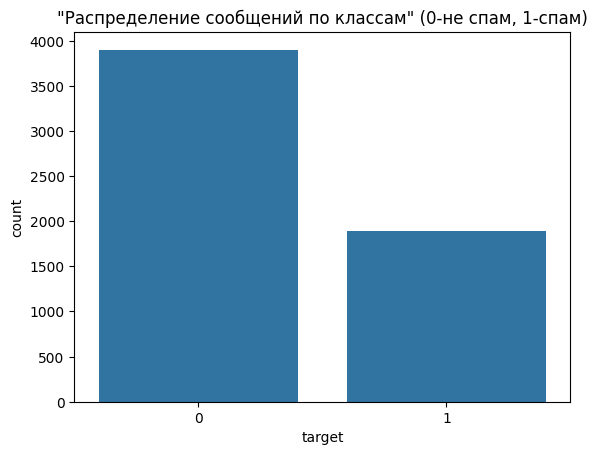

1. -- Результаты GradientBoostingClassifier --
Accuracy: 0.9752731454859115
Базовый отчет:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1165
           1       0.99      0.94      0.96       574

    accuracy                           0.98      1739
   macro avg       0.98      0.97      0.97      1739
weighted avg       0.98      0.98      0.98      1739

Матрица ошибок:


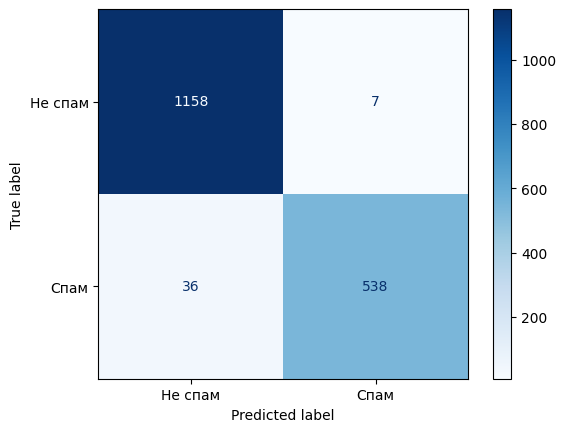

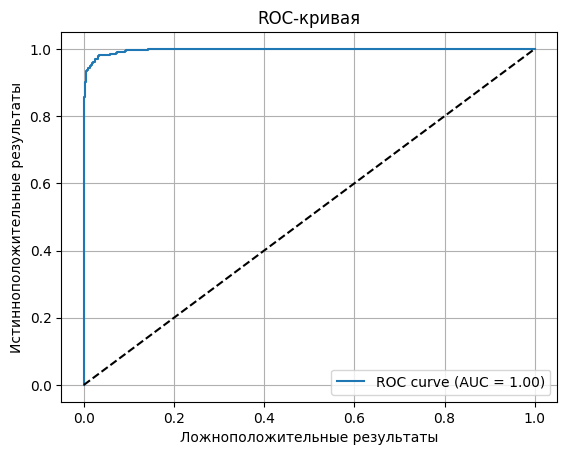

-----------------////////-------------------
2. -- Результаты DecisionTreeClassifier --
Accuracy: 0.953421506612996
Базовый отчет:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1165
           1       0.96      0.90      0.93       574

    accuracy                           0.95      1739
   macro avg       0.96      0.94      0.95      1739
weighted avg       0.95      0.95      0.95      1739

Матрица ошибок:


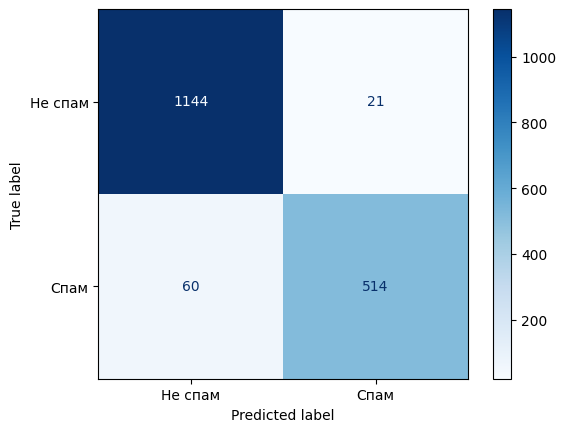

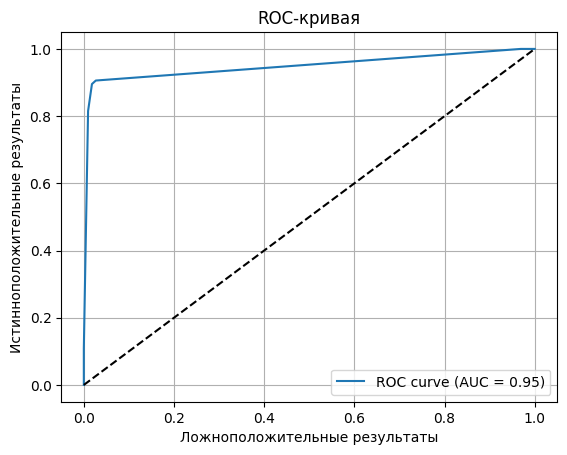

-----------------////////-------------------
3. -- Результаты KNeighborsClassifier --
Лучшее значение k: 1
Accuracy: 0.9873490511788384
Базовый отчет:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       0.98      0.98      0.98       569

    accuracy                           0.99      1739
   macro avg       0.99      0.99      0.99      1739
weighted avg       0.99      0.99      0.99      1739

Матрица ошибок:


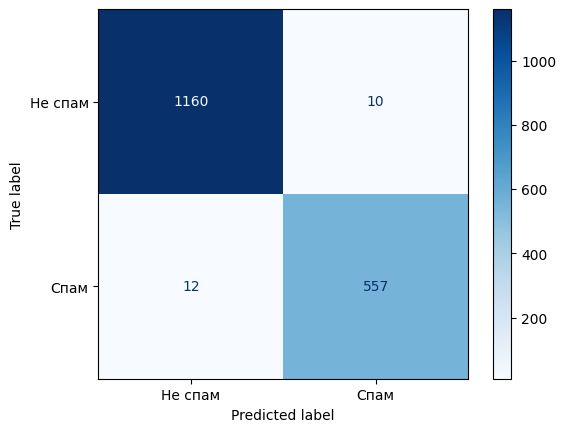

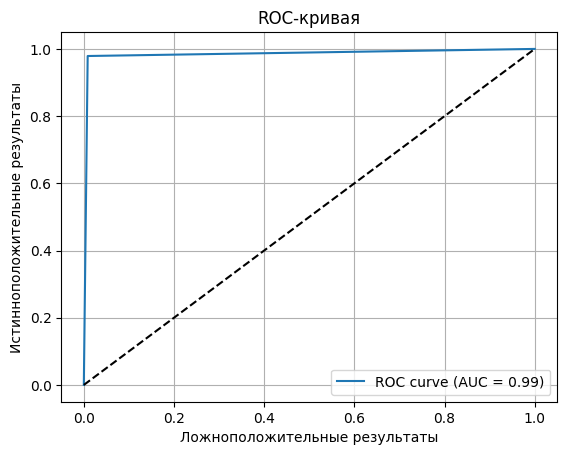

-----------------////////-------------------
4. -- Результаты Support Vector Machine --
Accuracy: 0.9907993099482462
Базовый отчет:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1170
           1       1.00      0.97      0.99       569

    accuracy                           0.99      1739
   macro avg       0.99      0.99      0.99      1739
weighted avg       0.99      0.99      0.99      1739

Матрица ошибок:


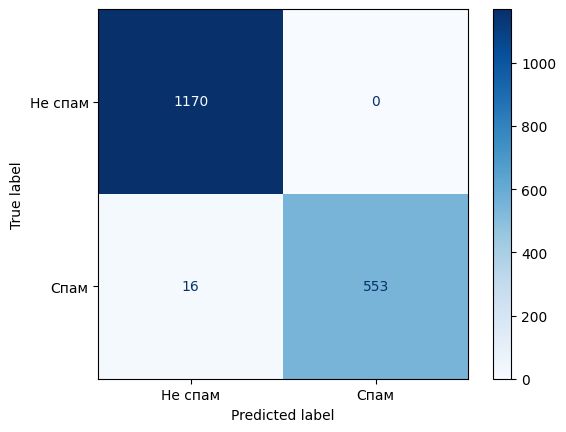

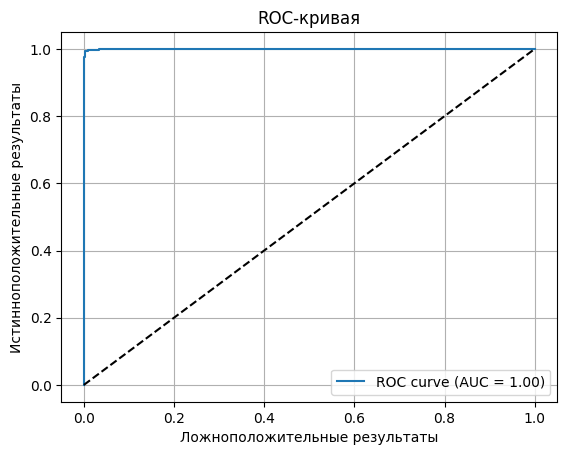

-----------------////////-------------------
5. -- Результаты QuadraticDiscriminantAnalysis --


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Лучшие параметры: {'qda__tol': 0.001, 'svd__n_components': 100}
Лучшее качество на кросс-валидации: 0.9793
Accuracy: 0.9821736630247269
Базовый отчет:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       0.97      0.97      0.97       569

    accuracy                           0.98      1739
   macro avg       0.98      0.98      0.98      1739
weighted avg       0.98      0.98      0.98      1739

Матрица ошибок:


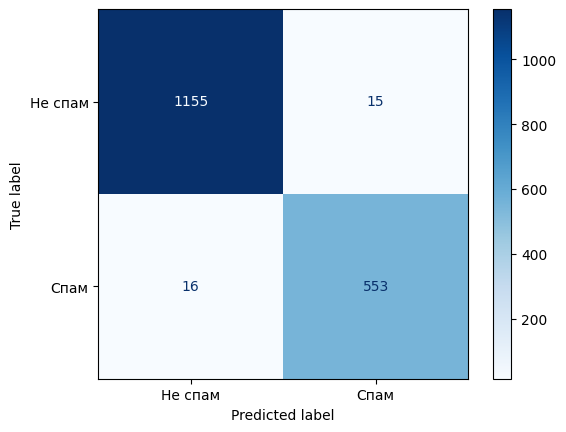

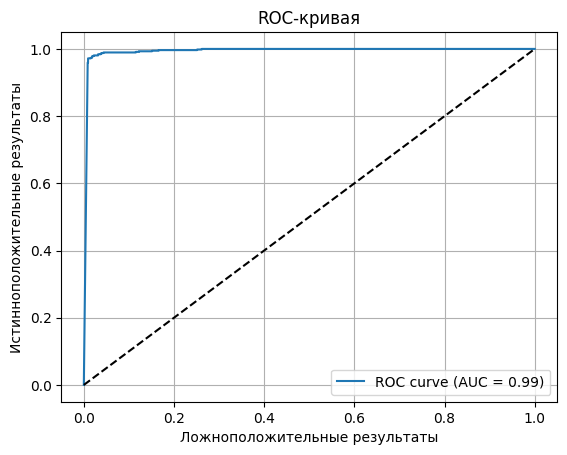

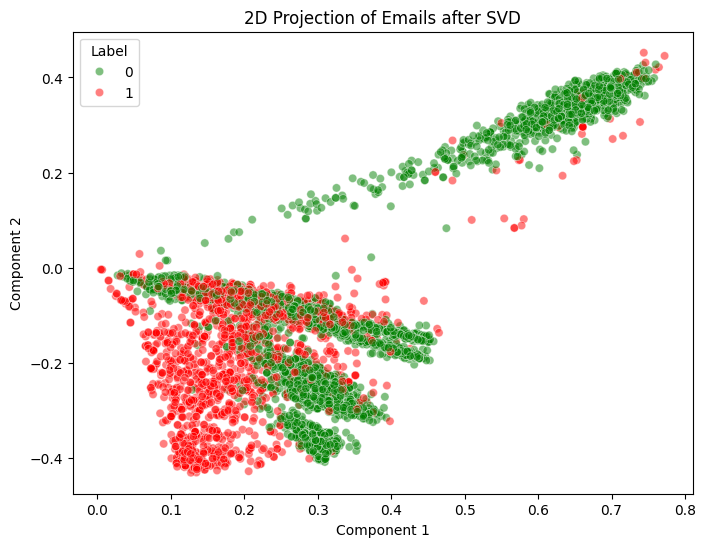

-----------------////////-------------------


In [1]:
# main.py
!pip install kaggle
import os
import shutil
import zipfile
import pandas as pd
import numpy as np
import file_load as fl
import data_quality as dq
import gradientboostingclassifier as gbcl
import decisiontreeclassifier as dtc
import kneighborsclassifier as knbcl
import supportvectormachine as sv
import quadraticdiscriminantanalysis as qda

# загрузка датасета из источника
#https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset
# определение пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')
# создание директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)
# перемещение файл
shutil.move(source_path, destination_path)
# устанавление прав доступа
os.chmod(destination_path, 0o600)

!kaggle datasets download -d ganiyuolalekan/spam-assassin-email-classification-dataset

# распаковка скачанного архива
with zipfile.ZipFile('spam-assassin-email-classification-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('spam-assassin-email-classification-dataset')
# просмотр файлов в директории
print('Файлы в директории:')
print(os.listdir('spam-assassin-email-classification-dataset'))

ds_path = 'spam-assassin-email-classification-dataset/spam_assassin.csv'
df = fl.data_load(ds_path)

X = df.text
y = df.target

# распредление классов
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Распределение классов:", class_distribution)

dq.data_quality(df)

# GradientBoostingClassifier
print('1. -- Результаты GradientBoostingClassifier --')
gbcl.gradientboostingclassifier(df, X, y)
print('-----------------////////-------------------')

# DecisionTreeClassifier
print('2. -- Результаты DecisionTreeClassifier --')
dtc.decisiontreeclassifier(df, X, y)
print('-----------------////////-------------------')

# KNeighborsClassifier
print('3. -- Результаты KNeighborsClassifier --')
knbcl.kneighborsclassifier(df, X, y)
print('-----------------////////-------------------')

# SVM
print('4. -- Результаты Support Vector Machine --')
sv.supportvectormachine(df, X, y)
print('-----------------////////-------------------')

# QDA
print('5. -- Результаты QuadraticDiscriminantAnalysis --')
qda.quadraticdiscriminantanalysis(df, X, y)
print('-----------------////////-------------------')

In [ ]:
# file_load.py
import pandas as pd

def data_load(ds_path):
  # загрузка данных файла CSV в DataFrame
  df = pd.read_csv(ds_path)
  # просмотр 5-ти первых строк датасета
  print(df.head())
  # получение общей инфы о датасете
  print(df.info())
  # вывод статистических данных о числовых столбцах
  print(df.describe())
  return df

In [ ]:
# data_quality.py
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def data_quality(df):
  sns.countplot(data = df, x = 'target')
  plt.title('"Распределение сообщений по классам" (0-не спам, 1-спам)', fontsize=12)
  plt.show()
  return

In [ ]:
# gradientboostingclassifier.py
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def gradientboostingclassifier(df, X, y):
  # разделение данных на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

  # векторизация текста (text)
  # stop_words='english' — игнорирование распространённых слов (например, "and", "the"), которые мало влияют на смысл
  # max_features=3000 — берём только 3000 самых информативных слов
  # обучение векторизатора на обучающем наборе данных (fit_transform), затем применение к тестовому набору данных (transform)
  vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)

  # создание модели Gradient Boosting Classifier
  gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=50)

  # обучение модели на обучающем наборе данных (с учетом векторизованных обучающих данных X_train_vec)
  gb_classifier.fit(X_train_vec, y_train)

  # предсказание классов на тестовом наборе данных
  y_pred = gb_classifier.predict(X_test_vec)

  # вывод полного отчета
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print('Базовый отчет:')
  print(classification_report(y_test, y_pred))
  # матрица ошибок
  print('Матрица ошибок:')
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Не спам", "Спам"])
  disp.plot(cmap='Blues')
  # кривая ROC-AUC
  y_proba = gb_classifier.predict_proba(X_test_vec)[:, 1]  # вероятность принадлежности к классу "Спам"
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # диагональ
  plt.xlabel('Ложноположительные результаты') # уровень ложноположительных результатов
  plt.ylabel('Истинноположительные результаты') # уровень истинноположительных результатов
  plt.title('ROC-кривая')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()
  return

In [ ]:
# decisiontreeclassifier.py
# Классификатор дерева решений - DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc

def decisiontreeclassifier(df, X, y):
  # разделение данных на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

  # векторизация текста (text)
  # stop_words='english' — игнорирование распространённых слов (например, "and", "the"), которые мало влияют на смысл
  # max_features=3000 — берём только 3000 самых информативных слов
  # обучение векторизатора на обучающем наборе данных (fit_transform), затем применение к тестовому набору данных (transform)
  vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)

  # создание модели DecisionTreeClassifier
  dtcls = DecisionTreeClassifier(max_depth=3, random_state=50)

  # обучение модели на обучающем наборе данных
  dtcls.fit(X_train_vec, y_train)

  # предсказание классов на тестовом наборе данных
  y_pred = dtcls.predict(X_test_vec)

  # вывод полного отчета
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print('Базовый отчет:')
  print(classification_report(y_test, y_pred))
  # матрица ошибок
  print('Матрица ошибок:')
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Не спам", "Спам"])
  disp.plot(cmap='Blues')
  # кривая ROC-AUC
  y_proba = dtcls.predict_proba(X_test_vec)[:, 1]  # вероятность принадлежности к классу "Спам"
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # диагональ
  plt.xlabel('Ложноположительные результаты') # уровень ложноположительных результатов
  plt.ylabel('Истинноположительные результаты') # уровень истинноположительных результатов
  plt.title('ROC-кривая')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()
  return

In [ ]:
# kneighborsclassifier.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc

def kneighborsclassifier(df, X, y):
  # разделение данных на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

  # векторизация текста (text)
  vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)

  # настройка гиперпараметра k с использованием GridSearchCV
  param_grid = {'n_neighbors': np.arange(1, 50)}
  knn = KNeighborsClassifier()
  knn_cv = GridSearchCV(knn, param_grid, cv=5)
  knn_cv.fit(X_train_vec, y_train)

  # обучение модели с лучшим значением k
  knn_best = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
  knn_best.fit(X_train_vec, y_train)

  # предсказание на тестовом наборе
  y_pred = knn_best.predict(X_test_vec)

  # Вывод лучшего значения k
  print("Лучшее значение k:", knn_cv.best_params_['n_neighbors'])

  # вывод полного отчета
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print('Базовый отчет:')
  print(classification_report(y_test, y_pred))
  # матрица ошибок
  print('Матрица ошибок:')
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Не спам", "Спам"])
  disp.plot(cmap='Blues')
  # кривая ROC-AUC
  y_proba = knn_best.predict_proba(X_test_vec)[:, 1]  # вероятность принадлежности к классу "Спам"
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # диагональ
  plt.xlabel('Ложноположительные результаты') # уровень ложноположительных результатов
  plt.ylabel('Истинноположительные результаты') # уровень истинноположительных результатов
  plt.title('ROC-кривая')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()
  return

In [ ]:
# supportvectormachine.py
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def supportvectormachine(df, X, y):
  # разделение данных на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

  # векторизация текста (text)
  vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)

  # создание модели SVM
  svm = SVC(kernel='linear', random_state=50, probability=True)

  # обучение модели на обучающем наборе данных
  svm.fit(X_train_vec, y_train)

  # предсказание классов на тестовом наборе данных
  y_pred = svm.predict(X_test_vec)

  # вывод полного отчета
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print('Базовый отчет:')
  print(classification_report(y_test, y_pred))
  # матрица ошибок
  print('Матрица ошибок:')
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Не спам", "Спам"])
  disp.plot(cmap='Blues')
  # кривая ROC-AUC
  y_proba = svm.predict_proba(X_test_vec)[:, 1]  # вероятность принадлежности к классу "Спам"
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # диагональ
  plt.xlabel('Ложноположительные результаты') # уровень ложноположительных результатов
  plt.ylabel('Истинноположительные результаты') # уровень истинноположительных результатов
  plt.title('ROC-кривая')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()
  return

In [ ]:
# quadraticdiscriminantanalysis.py
# QDA - квадратичный дискриминантный анализ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)

def quadraticdiscriminantanalysis(df, X, y):
  # разделение данных на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

  # создание pipeline с TF-IDF, SVD и QDA
  pipe = Pipeline([
      ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)), # векторизация
      ('svd', TruncatedSVD(random_state=50)), # снижение размерности, т.к. текстовые данные разреженны и многомерны
      ('qda', QuadraticDiscriminantAnalysis()) # модель QDA
  ])

  # настройка параметров с GridSearch
  param_grid = {
      'svd__n_components': [20, 50, 100],  # количество признаков после снижения размерности
      'qda__tol': [1e-3, 1e-4, 1e-5]    # порог регуляризации - для избегания проблем с вычислением ковариационной матрицы
  }
  grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)

  # предсказание классов на тестовом наборе данных
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  print(f"Лучшие параметры: {grid_search.best_params_}")
  print(f"Лучшее качество на кросс-валидации: {grid_search.best_score_:.4f}")

  # вывод полного отчета
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print('Базовый отчет:')
  print(classification_report(y_test, y_pred))
  # матрица ошибок
  print('Матрица ошибок:')
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Не спам", "Спам"])
  disp.plot(cmap='Blues')
  # кривая ROC-AUC
  y_proba = best_model.predict_proba(X_test)[:, 1]  # вероятность принадлежности к классу "Спам"
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], 'k--')  # диагональ
  plt.xlabel('Ложноположительные результаты') # уровень ложноположительных результатов
  plt.ylabel('Истинноположительные результаты') # уровень истинноположительных результатов
  plt.title('ROC-кривая')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

  # дополнительно - визуализация снижения размерности 2D с целью последующего применения QDA
  vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
  X_tfidf = vectorizer.fit_transform(X)
  svd_2d = TruncatedSVD(n_components=2, random_state=50)
  X_reduced_2d = svd_2d.fit_transform(X_tfidf)
  df_vis = pd.DataFrame({
      'Component 1': X_reduced_2d[:, 0],
      'Component 2': X_reduced_2d[:, 1],
      'Label': y
  })
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=df_vis, x='Component 1', y='Component 2',
                  hue='Label', palette=['green', 'red'], alpha=0.5)
  plt.title('2D Projection of Emails after SVD')
  plt.show()
  return